In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# https://www.kaggle.com/code/pawelpinkowicz/what-impact-happiness-lvl-and-ml-alg-to-predict-it
# https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [4]:
# data sets // by copypath
file_path = '/content/sample_data/WHR2024.csv'
data  = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
data.info()
"""
The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

link : https://www.w3schools.com/python/pandas/ref_df_info.asp
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [9]:
data.describe()
"""
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.


"""

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [10]:
data = data.dropna()
"""
The dropna() method removes the rows that contains NULL values.

The dropna() method returns a new DataFrame object unless the inplace parameter is set to True, in that case the dropna() method does the removing in the original DataFrame instead.

https://www.w3schools.com/python/pandas/ref_df_dropna.asp
"""
X = data.drop(columns=['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker'])
y = data['Ladder score']

X.head()


,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [ ]:
 y.head()

0    7.741
1    7.583
2    7.525
3    7.344
4    7.341
Name: Ladder score, dtype: float64

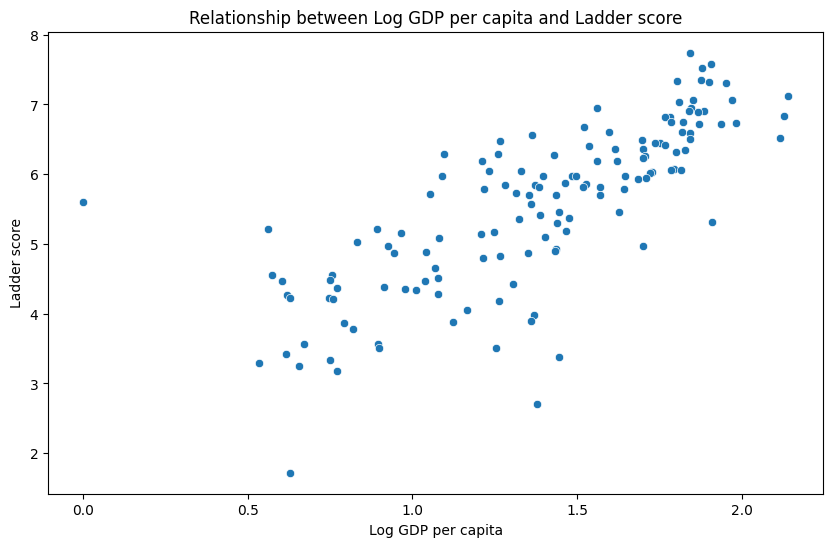

In [ ]:
plt.figure(figsize=(10, 6))
"""
https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
https://indianaiproduction.com/seaborn-scatter-plot/
https://pythonbasics.org/seaborn-scatterplot/
"""
sns.scatterplot(x=data['Explained by: Log GDP per capita'], y=data['Ladder score'])
plt.xlabel('Log GDP per capita')
plt.ylabel('Ladder score')
plt.title('Relationship between Log GDP per capita and Ladder score')
plt.show()

Mean Squared Error: 0.5671764071550741
R-squared: 0.5905979099399621


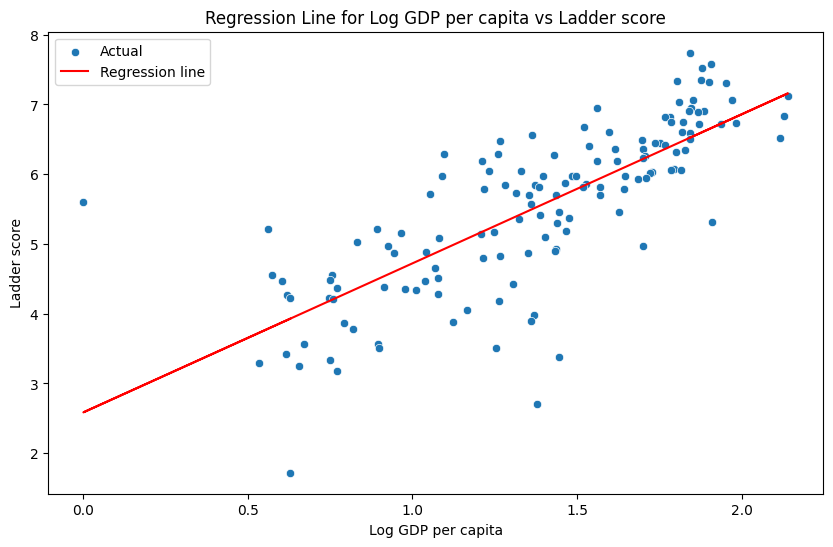

In [ ]:

X = data[['Explained by: Log GDP per capita']].dropna()
y = data['Ladder score'].dropna()


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# رسم خط الانحدار مع النقاط
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Explained by: Log GDP per capita'], y=data['Ladder score'], label='Actual')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Log GDP per capita')
plt.ylabel('Ladder score')
plt.title('Regression Line for Log GDP per capita vs Ladder score')
plt.legend()
plt.show()

